**3. (Optional) Dựa vào file “2.FashionMNIST-CNN-onlyConv.ipynb”, áp dụng CNN cho Cifar10 data**

- Cifar10

In [ ]:
import tensorflow as tf
from tensorflow import keras


# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Data standardization
train_images = (train_images - train_images.mean(axis=(1,2)).reshape((train_images.shape[0],1,1,train_images.shape[-1]))) / \
                train_images.std(axis=(1, 2)).reshape((train_images.shape[0],1,1,train_images.shape[-1]))
test_images  = (test_images - test_images.mean(axis=(1,2)).reshape((test_images.shape[0],1,1,test_images.shape[-1]))) / \
                test_images.std(axis=(1, 2)).reshape((test_images.shape[0],1,1,test_images.shape[-1]))
                
weight_decay = 1e-4

# model
model = keras.models.Sequential()

# input is with the shape of (32, 32, 3)
model.add(tf.keras.Input(shape=(32, 32, 3)))

# Convolve with (5x5) kernel 
# Output: (28x28x32)
model.add(keras.layers.Conv2D(32, (5, 5), activation='relu', 
                              kernel_initializer=keras.initializers.HeNormal(),
                              kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
# Convolve with (5x5) kernel 
# Output: (24x24x64)
model.add(keras.layers.Conv2D(64, (5, 5), activation='relu',
                              kernel_initializer=keras.initializers.HeNormal(),
                              kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))

# Convolve with (5x5) kernel 
# Output: (20x20x128)
model.add(keras.layers.Conv2D(128, (5, 5), activation='relu',
                              kernel_initializer=keras.initializers.HeNormal(),
                              kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.6))

# Convolve with (5x5) kernel 
# Output: (16x16x256)
model.add(keras.layers.Conv2D(256, (5, 5), activation='relu',
                              kernel_initializer=keras.initializers.HeNormal(),
                              kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.8))

# flatten
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=keras.initializers.HeNormal(),
                             kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.8))

model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
history = model.fit(train_images, train_labels, epochs=50, batch_size=512, validation_split=0.1)

# testing
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('\n\nTest accuracy:', test_acc)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
batch_normalization_43 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_40 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
batch_normalization_44 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_41 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 20, 20, 128)     

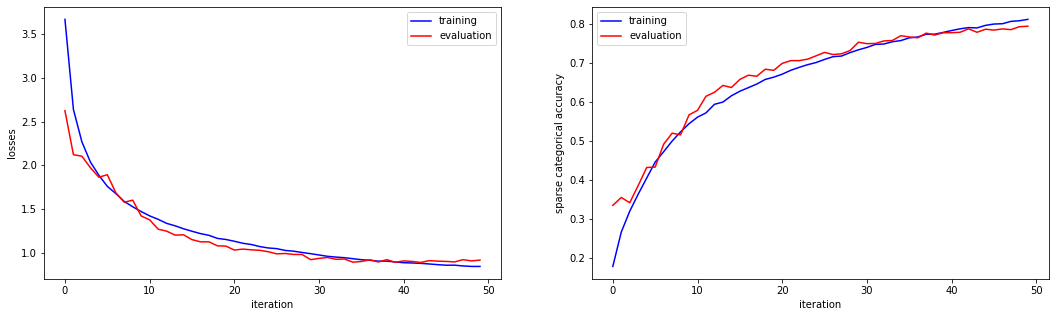

In [ ]:
import matplotlib.pyplot as plt

# plotting 
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(history.history['loss'], color='b', label='training')
axs[0].set(xlabel='iteration', ylabel='losses')
axs[0].plot(history.history['val_loss'], color='r', label='evaluation')
axs[0].legend()
axs[1].plot(history.history['sparse_categorical_accuracy'], color='b', label='training')
axs[1].plot(history.history['val_sparse_categorical_accuracy'], color='r', label='evaluation')
axs[1].set(xlabel='iteration', ylabel='sparse categorical accuracy')
axs[1].legend()

The model accurracy has increased from 59% to 79%.

- Fashion mnist

In [2]:
import tensorflow as tf
from tensorflow import keras


# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Data standardization
train_images = (train_images - train_images.mean(axis=(1,2)).reshape((train_images.shape[0],1,1))) / \
                train_images.std(axis=(1, 2)).reshape((train_images.shape[0],1,1))
test_images  = (test_images - test_images.mean(axis=(1,2)).reshape((test_images.shape[0],1,1))) / \
                test_images.std(axis=(1, 2)).reshape((test_images.shape[0],1,1))

train_images = tf.reshape(train_images, (60000, 28, 28, 1))
test_images  = tf.reshape(test_images, (10000, 28, 28, 1))

weight_decay = 1e-4

# model
model = keras.models.Sequential()

# input is with the shape of (28, 28, 1)
model.add(tf.keras.Input(shape=(28, 28, 1)))

# Convolve with (3x3) kernel 
# Output: (26x26x32)
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', 
                              kernel_initializer=keras.initializers.HeNormal(),
                              kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
# Convolve with (3x3) kernel 
# Output: (22x22x64)
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',
                              kernel_initializer=keras.initializers.HeNormal(),
                              kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.4))

# Convolve with (3x3) kernel 
# Output: (20x20x128)
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu',
                              kernel_initializer=keras.initializers.HeNormal(),
                              kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.6))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu',
                             kernel_initializer=keras.initializers.HeNormal(),
                             kernel_regularizer=keras.regularizers.l2(weight_decay)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.8))

model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.0002),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
history = model.fit(train_images, train_labels, epochs=50, batch_size=256, validation_split=0.1)

# testing
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('\n\nTest accuracy:', test_acc)

4423680/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
___________________________________________________________

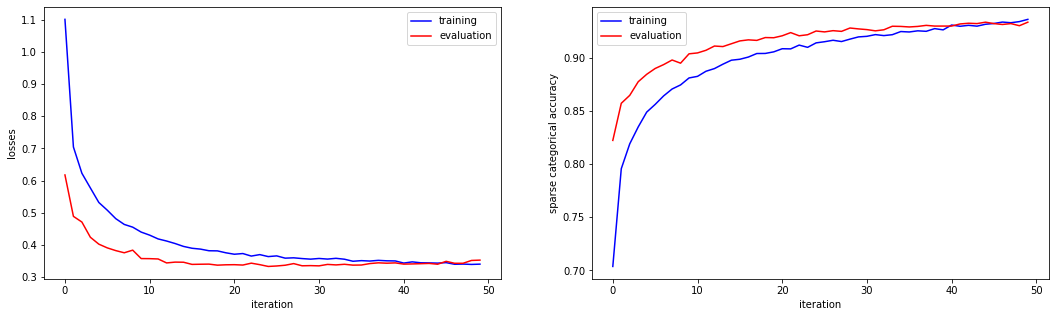

In [5]:
import matplotlib.pyplot as plt

# plotting 
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(history.history['loss'], color='b', label='training')
axs[0].set(xlabel='iteration', ylabel='losses')
axs[0].plot(history.history['val_loss'], color='r', label='evaluation')
axs[0].legend()
axs[1].plot(history.history['sparse_categorical_accuracy'], color='b', label='training')
axs[1].plot(history.history['val_sparse_categorical_accuracy'], color='r', label='evaluation')
axs[1].set(xlabel='iteration', ylabel='sparse categorical accuracy')
axs[1].legend()

The model accurracy has increased from 89% to 92%.

**4. (Optional) Các bạn tìm hiểu sơ qua các cách lấy feature trong computer vision như sobel, local binary patter; để thấy được ý nghĩa của các filter trong CNN.**

An image gradient is a directional change in image intensity. The image gradient can help to detect edge in the image. Sobel method, which actually uses two kernels: one for detecting horizontal changes in direction and the other for detecting vertical changes in direction. 

\begin{align*}
G_x &= \begin{bmatrix}
                      -1 & 0 & 1 \\
                      -2 & 0 & 2 \\
                      -1 & 0 & 1 \end{bmatrix}
\\
\\
G_y &= \begin{bmatrix}
                      -1 & -2 & -1 \\
                      -0 & 0 & 0 \\
                      1 & 2 & 1 \end{bmatrix}
\end{align*}



**5. (Optional) Các bạn suy nghĩ ý nghĩa của việc dùng filter (1x1).**

Convolution filters (1x1) help to control the number of channels of the feature map.
For example, let's say we have a layer with shape (4,4,32). After convolving the layer with 256 (1x1) filters we'll have a layer with shape (4,4,256). In this case, we increase the complexity of the model by increasing the number of channels. On the other hand, we can reduce the model complexity by decreasing that number.